<a href="https://colab.research.google.com/github/WesleyAldridge/Quantum-Phase-Estimation/blob/master/quantum_phase_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Phase Estimation
##### ( Answer 2 of homework 3, COT5600 spring 2019 )
#### Wesley Aldridge

"Let $\varphi\in[0,1)$ be arbitrary and


![alt text](https://i.gyazo.com/c561cce86d27deb2fc902e0e9483c63d.png)


Create a Python notebook that lets you compute and plot the probabilities for measuring $x\in\{0,1\}^n$ when the state is

![alt text](https://i.gyazo.com/f507bcd01e5390c75456e91931bad892.png)


for different $N$ and $\varphi$.  The plot should look similar to the plots on the slides depicting the different probability distributions.  Do not forget about the bit-reversal that we talked about in class."

-- Instructions

### Imports

In [0]:
import numpy as np
from numpy import arange
import cmath, math
from cmath import pi, sqrt, exp
import matplotlib.pyplot as plt

### Global constants

In [0]:
ket_0 = np.mat("1; 0")
ket_1 = np.mat("0; 1")

coeff = 1/sqrt(2)
i = 1j

### Calculating first vector $|\varphi>$

In [0]:
def get_ket_varphi(varphi, n):
    arr = arange(n)
    arr = arr[::-1]
    
    product = np.zeros((2,1))
    
    for k in arr:
        if k == n-1:
            product = coeff * ( ket_0 + exp(2*pi*i*(2**k)*varphi) * ket_1 )
        else:
            product = np.kron(product, (coeff * ( ket_0 + exp(2*pi*1j*(2**k)*varphi) * ket_1 ))) # axes = 0 is tensor product.
        #print("current product is:")
        #print(product)
        #print(product.shape)
        #print()
        if k == 0:
            return product

#print(get_ket_varphi(varphi, 2))

### Calculating Fourier Matrix $F_N$

![alt text](https://i.gyazo.com/83d8180df0c232570d9572846c518f34.png)

In [0]:
def Fourier_matrix(N):
    # square matrix which represents the powers of omega:
    k, l = np.meshgrid(np.arange(N), np.arange(N))
    
    omega = np.exp( - 2 * pi * 1j / N )
    F = np.power( omega, k * l ) / sqrt(N)
    return F

#print("F_2:")
#print(Fourier_matrix(2))
#print()
#print()
#print("F_4:")
#print(Fourier_matrix(4))
#print()
#print()
#print("F_N:")
#print(Fourier_matrix(N))

#k, l = np.meshgrid(np.arange(8), np.arange(8))
#k*l

In [0]:
def make_bra(value, N):
        bra_x = np.zeros((N))
        bra_x[value] = 1
        
        return bra_x

### Set $N = 2^5$, $\varphi = 32/256$

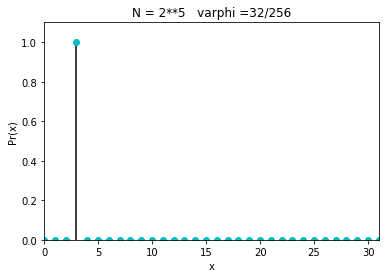

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
n = 5
N = (2**n)

x = 32
y = 256
varphi = x/y   # phase [0, 1)

# Plotting:

# Probabilities:
# = | <x| F^\dagger |\varphi> |^2
# = absolute_value( bra_x  * (F^dagger * varphi_ket) )^2
# from page 128 of notes
yvalues = [abs(make_bra(value,N) * (np.conjugate(np.transpose(Fourier_matrix(N))) * get_ket_varphi(varphi, n))).item(0) **2 for value in arange(32)][::-1]
xvalues = arange(32)
plt.plot(xvalues, np.round(yvalues, decimals=2), 'co')
plt.vlines(x=xvalues, ymin=0, ymax=np.round(yvalues, decimals=2))
label = "N = 2**" + str(n) + "   varphi =" + str(x) + "/" + str(y)
plt.title(label)
plt.ylabel("Pr(x)")
plt.xlabel("x")
plt.axis([0, 31, -0.0, 1.1]) # xmin,xmax,ymin,ymax
plt.show()


np.round(yvalues, decimals=2)

### Set $N = 2^5$, $\varphi = 33/256$

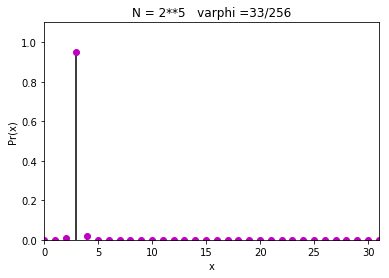

array([0.  , 0.  , 0.01, 0.95, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [0]:
n = 5
N = (2**n)

x = 33
y = 256
varphi = x/y   # phase [0, 1)

# Plotting:
yvalues = [abs(make_bra(value,N) * (np.conjugate(np.transpose(Fourier_matrix(N))) * get_ket_varphi(varphi, n))).item(0) **2 for value in arange(32)][::-1]
xvalues = arange(32)
plt.plot(xvalues, np.round(yvalues, decimals=2), 'mo')
plt.vlines(x=xvalues, ymin=0, ymax=np.round(yvalues, decimals=2))
label = "N = 2**" + str(n) + "   varphi =" + str(x) + "/" + str(y)
plt.title(label)
plt.ylabel("Pr(x)")
plt.xlabel("x")
plt.axis([0, 31, -0.0, 1.1]) # xmin,xmax,ymin,ymax
plt.show()


np.round(yvalues, decimals=2)

### Set $N = 2^5$, $\varphi = 34/256$

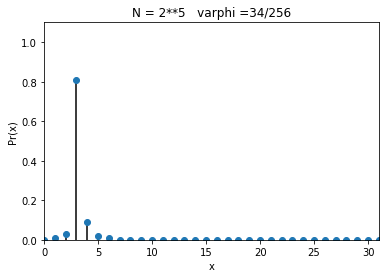

array([0.  , 0.01, 0.03, 0.81, 0.09, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [0]:
n = 5
N = (2**n)

x = 34
y = 256
varphi = x/y   # phase [0, 1)

# Plotting:
yvalues = [abs(make_bra(value,N) * (np.conjugate(np.transpose(Fourier_matrix(N))) * get_ket_varphi(varphi, n))).item(0) **2 for value in arange(32)][::-1]
xvalues = arange(32)
plt.plot(xvalues, np.round(yvalues, decimals=2), 'o')
plt.vlines(x=xvalues, ymin=0, ymax=np.round(yvalues, decimals=2))
label = "N = 2**" + str(n) + "   varphi =" + str(x) + "/" + str(y)
plt.title(label)
plt.ylabel("Pr(x)")
plt.xlabel("x")
plt.axis([0, 31, -0.0, 1.1]) # xmin,xmax,ymin,ymax
plt.show()


np.round(yvalues, decimals=2)

### Set $N = 2^5$, $\varphi = 35/256$

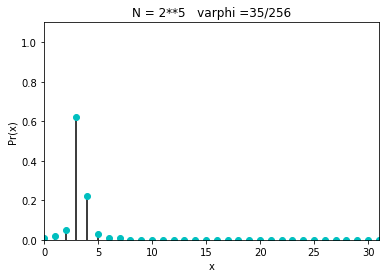

array([0.01, 0.02, 0.05, 0.62, 0.22, 0.03, 0.01, 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [0]:
n = 5
N = (2**n)

x = 35
y = 256
varphi = x/y   # phase [0, 1)

# Plotting:
yvalues = [abs(make_bra(value,N) * (np.conjugate(np.transpose(Fourier_matrix(N))) * get_ket_varphi(varphi, n))).item(0) **2 for value in arange(32)][::-1]
xvalues = arange(32)
plt.plot(xvalues, np.round(yvalues, decimals=2), 'co')
plt.vlines(x=xvalues, ymin=0, ymax=np.round(yvalues, decimals=2))
label = "N = 2**" + str(n) + "   varphi =" + str(x) + "/" + str(y)
plt.title(label)
plt.ylabel("Pr(x)")
plt.xlabel("x")
plt.axis([0, 31, -0.0, 1.1]) # xmin,xmax,ymin,ymax
plt.show()


np.round(yvalues, decimals=2)

### Set $N = 2^5$, $\varphi = 36/256$


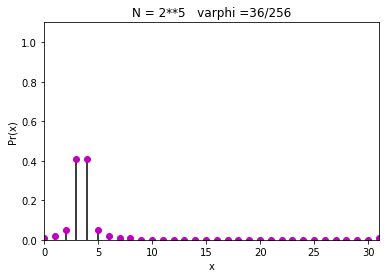

array([0.01, 0.02, 0.05, 0.41, 0.41, 0.05, 0.02, 0.01, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01])

In [0]:
n = 5
N = (2**n)

x = 36
y = 256
varphi = x/y   # phase [0, 1)

# Plotting:
yvalues = [abs(make_bra(value,N) * (np.conjugate(np.transpose(Fourier_matrix(N))) * get_ket_varphi(varphi, n))).item(0) **2 for value in arange(32)][::-1]
xvalues = arange(32)
plt.plot(xvalues, np.round(yvalues, decimals=2), 'mo')
plt.vlines(x=xvalues, ymin=0, ymax=np.round(yvalues, decimals=2))
label = "N = 2**" + str(n) + "   varphi =" + str(x) + "/" + str(y)
plt.title(label)
plt.ylabel("Pr(x)")
plt.xlabel("x")
plt.axis([0, 31, -0.0, 1.1]) # xmin,xmax,ymin,ymax
plt.show()


np.round(yvalues, decimals=2)

### Set $N = 2^5$, $\varphi = 37/256$

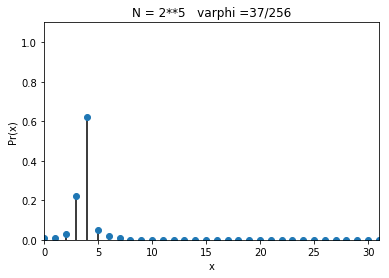

array([0.01, 0.01, 0.03, 0.22, 0.62, 0.05, 0.02, 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [0]:
n = 5
N = (2**n)

x = 37
y = 256
varphi = x/y   # phase [0, 1)

# Plotting:
yvalues = [abs(make_bra(value,N) * (np.conjugate(np.transpose(Fourier_matrix(N))) * get_ket_varphi(varphi, n))).item(0) **2 for value in arange(32)][::-1]
xvalues = arange(32)
plt.plot(xvalues, np.round(yvalues, decimals=2), 'o')
plt.vlines(x=xvalues, ymin=0, ymax=np.round(yvalues, decimals=2))
label = "N = 2**" + str(n) + "   varphi =" + str(x) + "/" + str(y)
plt.title(label)
plt.ylabel("Pr(x)")
plt.xlabel("x")
plt.axis([0, 31, -0.0, 1.1]) # xmin,xmax,ymin,ymax
plt.show()


np.round(yvalues, decimals=2)

### Set $N = 2^5$, $\varphi = 38/256$

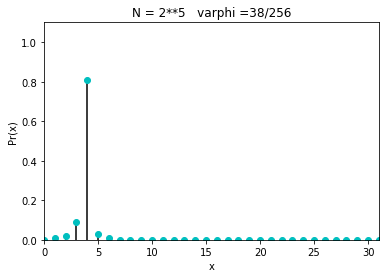

array([0.  , 0.01, 0.02, 0.09, 0.81, 0.03, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [0]:
n = 5
N = (2**n)

x = 38
y = 256
varphi = x/y   # phase [0, 1)

# Plotting:
yvalues = [abs(make_bra(value,N) * (np.conjugate(np.transpose(Fourier_matrix(N))) * get_ket_varphi(varphi, n))).item(0) **2 for value in arange(32)][::-1]
xvalues = arange(32)
plt.plot(xvalues, np.round(yvalues, decimals=2), 'co')
plt.vlines(x=xvalues, ymin=0, ymax=np.round(yvalues, decimals=2))
label = "N = 2**" + str(n) + "   varphi =" + str(x) + "/" + str(y)
plt.title(label)
plt.ylabel("Pr(x)")
plt.xlabel("x")
plt.axis([0, 31, -0.0, 1.1]) # xmin,xmax,ymin,ymax
plt.show()


np.round(yvalues, decimals=2)

### Set $N = 2^5$, $\varphi = 39/256$

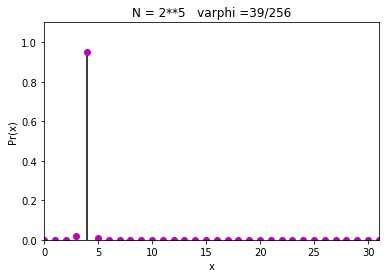

array([0.  , 0.  , 0.  , 0.02, 0.95, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [0]:
n = 5
N = (2**n)

x = 39
y = 256
varphi = x/y   # phase [0, 1)

# Plotting:
yvalues = [abs(make_bra(value,N) * (np.conjugate(np.transpose(Fourier_matrix(N))) * get_ket_varphi(varphi, n))).item(0) **2 for value in arange(32)][::-1]
xvalues = arange(32)

plt.plot(xvalues, np.round(yvalues, decimals=2), 'mo')

plt.vlines(x=xvalues, ymin=0, ymax=np.round(yvalues, decimals=2))
label = "N = 2**" + str(n) + "   varphi =" + str(x) + "/" + str(y)
plt.title(label)
plt.ylabel("Pr(x)")
plt.xlabel("x")
plt.axis([0, 31, 0, 1.1]) # xmin,xmax,ymin,ymax
plt.show()


np.round(yvalues, decimals=2)

### Set $N = 2^5$, $\varphi = 40/256$

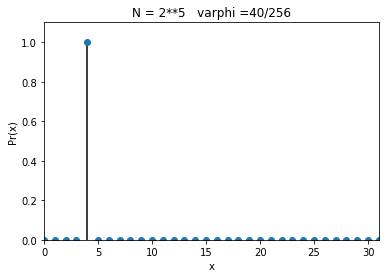

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
n = 5
N = (2**n)

x = 40
y = 256
varphi = x/y   # phase [0, 1)

#arr[::-1] reverses the values.

# Plotting:
yvalues = [abs(make_bra(value,N) * (np.conjugate(np.transpose(Fourier_matrix(N))) * get_ket_varphi(varphi, n))).item(0) **2 for value in arange(32)][::-1]
xvalues = arange(32)
plt.plot(xvalues, np.round(yvalues, decimals=2), 'o')
plt.vlines(x=xvalues, ymin=0, ymax=np.round(yvalues, decimals=2))
label = "N = 2**" + str(n) + "   varphi =" + str(x) + "/" + str(y)
plt.title(label)
plt.ylabel("Pr(x)")
plt.xlabel("x")
plt.axis([0, 31, -0.0, 1.1]) # xmin,xmax,ymin,ymax
plt.show()


np.round(yvalues, decimals=2)